# <div style="text-align: center"> Advanced Machine Learning

## <div style="text-align: center">Object-Oriented Programming (II)
    
### <div style="text-align: center">OOP basic concepts


---

![logo](https://www.kozminski.edu.pl/fileadmin/_processed_/csm_logotypy_plaskie__kozminski_university_0430be3c25.png)
![logo2](https://efs.mrpips.gov.pl/__data/assets/image/0014/11336/04_zestawienie_power_rp_ue_efs.png)

---

### References:
- Python Programming: https://www.programiz.com/python-programming
- Python OOP Tutorial: https://www.youtube.com/watch?v=ZDa-Z5JzLYM&list=PL-osiE80TeTsqhIuOqKhwlXsIBIdSeYtc


- Setting up a Python Development Environment in Atom: <br>
https://www.youtube.com/watch?v=DjEuROpsvp4&list=PL-osiE80TeTt66h8cVpmbayBKlMTuS55y&index=3

# Object Oriented Programming

## Inheritance continuation - Method Overriding in Python

### Creating an inheritance example

A polygon is a closed figure with 3 or more sides. Say, we have a class called Polygon defined as follows.

In [1]:
class Polygon:
    def __init__(self, no_of_sides):
        self.n = no_of_sides

    def inputSides(self):
        self.length_of_sides = [float(input("Enter side length "+str(i+1)+" : ")) for i in range(self.n)]

    def dispSides(self):
        for i in range(self.n):
            print("Side", i+1,"length is", self.length_of_sides[i])

In [2]:
test_obj = Polygon()

TypeError: __init__() missing 1 required positional argument: 'no_of_sides'

In [3]:
poly = Polygon(4)
poly.inputSides()
poly.dispSides()

Enter side length 1 : 4
Enter side length 2 : 4
Enter side length 3 : 4
Enter side length 4 : 5
Side 1 length is 4.0
Side 2 length is 4.0
Side 3 length is 4.0
Side 4 length is 5.0


In [4]:
poly.__dict__

{'n': 4, 'length_of_sides': [4.0, 4.0, 4.0, 5.0]}

This class has data attributes to store the number of sides `n` and magnitude of each side as a list called `sides`.

The `inputSides()` method takes in the magnitude of each side and `dispSides()` displays these side lengths.

A triangle is a polygon with 3 sides. So, we can create a class called `Triangle` which inherits from `Polygon`. This makes all the attributes of `Polygon` class available to the `Triangle` class.

We don't need to define them again (code reusability). `Triangle` can be defined as follows.

In [5]:
class Triangle(Polygon):
    def __init__(self):
        super().__init__(no_of_sides=3)

    def findArea(self):
        a, b, c = self.length_of_sides
        # calculate the semi-perimeter
        s = (a + b + c) / 2
        area = (s*(s-a)*(s-b)*(s-c)) ** 0.5
        print('The area of the triangle is %0.2f' %area)

TASK: Create a `triangle_object` and calculate its area, using the `findArea` method.

In [6]:
triangle_object = Triangle()

In [7]:
triangle_object.findArea()

AttributeError: 'Triangle' object has no attribute 'length_of_sides'

In [8]:
triangle_object

In [9]:
triangle_object.__dict__

{'n': 3}

In [10]:
triangle_object.n

3

In [11]:
triangle_object.inputSides()

Enter side length 1 : 3
Enter side length 2 : 4
Enter side length 3 : 5


In [12]:
triangle_object.__dict__

{'n': 3, 'length_of_sides': [3.0, 4.0, 5.0]}

In [13]:
triangle_object.dispSides()

Side 1 length is 3.0
Side 2 length is 4.0
Side 3 length is 5.0


In [14]:
triangle_object.findArea()

The area of the triangle is 6.00


In [15]:
class Triangle(Polygon):
    def __init__(self):
        # note that we are not using super() here!
        Polygon.__init__(self, no_of_sides=3)

    def findArea(self):
        a, b, c = self.sides
        # calculate the semi-perimeter
        s = (a + b + c) / 2
        area = (s*(s-a)*(s-b)*(s-c)) ** 0.5
        print('The area of the triangle is %0.2f' %area)

However, class `Triangle` has a new method `findArea()` to find and print the area of the triangle. Here is a sample run.

In [16]:
import pandas as pd

In [17]:
pd.DataFrame()

""


In [18]:
type(pd.DataFrame())

pandas.core.frame.DataFrame

In [19]:
pd.DataFrame.__module__

'pandas.core.frame'

In [20]:
pd.core.frame

<module 'pandas.core.frame' from 'D:\\Python\\lib\\site-packages\\pandas\\core\\frame.py'>

In [21]:
pd.DataFrame(columns=['A'])

,A


In [22]:
poly = Polygon(8)

In [23]:
t = Triangle()

In [25]:
t = Triangle()

t.inputSides()
'''
Enter side 1 : 3
Enter side 2 : 5
Enter side 3 : 4
'''

t.dispSides()

t.findArea()

Enter side length 1 : 3
Enter side length 2 : 5
Enter side length 3 : 4
Side 1 length is 3.0
Side 2 length is 5.0
Side 3 length is 4.0


AttributeError: 'Triangle' object has no attribute 'sides'

We can see that even though we did not define methods like `inputSides()` or `dispSides()` for class `Triangle` separately, we were able to use them.

If an attribute is not found in the class itself, the search continues to the base class. This repeats recursively, if the base class is itself derived from other classes.

### Method Overriding
In the above example, notice that `__init__()` method was defined in both classes, `Triangle` as well `Polygon`. When this happens, the method in the derived class overrides that in the base class. This is to say, `__init__()` in `Triangle` gets preference over the `__init__` in `Polygon`.

Generally when overriding a base method, we tend to extend the definition rather than simply replace it. The same is being done by calling the method in base class from the one in derived class (calling `Polygon.__init__()` from `__init__()` in `Triangle`).

A better option would be to use the built-in function `super()`. So, `super().__init__(3)` is equivalent to `Polygon.__init__(self,3)` and is preferred. To learn more about the `super()` function in Python, visit [Python super() function](https://rhettinger.wordpress.com/2011/05/26/super-considered-super/).

Two built-in functions `isinstance()` and `issubclass()` are used to check inheritances.

The function `isinstance()` returns `True` if the object is an instance of the class or other classes derived from it. Each and every class in Python inherits from the base class object.

In [26]:
print(
    isinstance(t, Triangle), 
    isinstance(t, Polygon), 
    isinstance(t, int), 
    isinstance(1, int),
    isinstance(t, object), 
    isinstance(1, object), 
    isinstance(Polygon, object)
)


True True False True True True True


Similarly, `issubclass()` is used to check for class inheritance.

In [27]:
print(
    issubclass(Polygon,Triangle), 
    issubclass(Triangle,Polygon),
    issubclass(bool,int)
)

False True True


<div class="alert alert-block alert-success">
⚠️TASK 1
<br>

In Atom (or other code processor), use the file `python_OOP3.py`, and inside it create a child class `Scientist` that has 3 basic attributes in the `__init__` method INHERITED from the `Employee` class: `first`, `last`, and `pay`. Override his pay to be by default `90000`. Redefine his `first` attribute to be equal to `'Dr. ' + first` .
    
In the end, create an instance of scientist `sci_1` with the following parameters: `first='Owen'`, `last='Wilson'`.
Print his `.fullname()`, and all his attributes to the screen, using the special attribute `.__dict__`.

</div>

In [50]:
class Employee:

    raise_amt = 1.04

    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.email = first + '.' + last + '@email.com'
        self.pay = pay

    def fullname(self):
        return '{} {}'.format(self.first, self.last)

    def apply_raise(self):
        self.pay = int(self.pay * self.raise_amt)


class Scientist(Employee):
    def __init__(self, first, last, pay=90000):
        super().__init__(first, last, pay)
        self.first = 'Dr. ' + first

class JuniorScientist(Scientist):
    def __init__(self, first, last, special_skill, pay=20000):
        super().__init__(first, last, pay)
        self.special_skill = special_skill
        self.first = first

sci_1 = Scientist('Owen', 'Wilson')
print(sci_1.fullname())
sci_1.__dict__

jun_sci1 = JuniorScientist('Katy', 'Cherry', 'mind control')
jun_sci1.__dict__

Dr. Owen Wilson


{'first': 'Katy',
 'last': 'Cherry',
 'email': 'Katy.Cherry@email.com',
 'pay': 20000,
 'special_skill': 'mind control'}

## Python Multiple Inheritance
A class can be derived from more than one base class in Python, similar to C++. This is called multiple inheritance.

In multiple inheritance, the features of all the base classes are inherited into the derived class. The syntax for multiple inheritance is similar to single inheritance.

In [28]:
class Base1:
    pass

class Base2:
    pass

class MultiDerived(Base1, Base2):
    pass

Here, the `MultiDerived` class is derived from `Base1` and `Base2` classes.

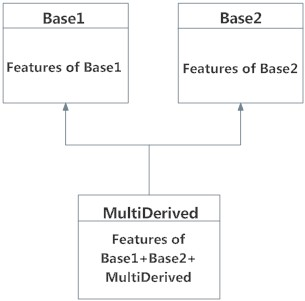

The `MultiDerived` class inherits from both `Base1` and `Base2` classes.

---

We can also inherit from a derived class. This is called multilevel inheritance. It can be of any depth in Python.

In multilevel inheritance, features of the base class and the derived class are inherited into the new derived class.

An example with corresponding visualization is given below.

In [29]:
class Base:
    pass

class Derived1(Base):
    pass

class Derived2(Derived1):
    pass

Here, the `Derived1` class is derived from the `Base` class, and the `Derived2` class is derived from the `Derived1` class.

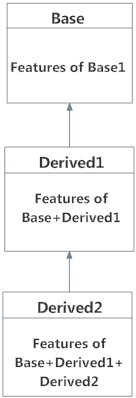

<div class="alert alert-block alert-success">
⚠️TASK 2
<br>

Create a `JuniorScientist` class that would inherit both from the `Employee` and from the `Scientist` classes. Override its pay to be 20000. Add its special parameter `special_skill`.
    
In the end, create an instance of the junior scientist `junsci_1` with the following parameters: `first='Katy'`, `last='Cherry'`, `special_skill='mind control'`.
Print her `.fullname()`, and all her attributes to the screen, using the special attribute `.__dict__`.

</div>

In [51]:
class Employee:

    raise_amt = 1.04

    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.email = first + '.' + last + '@email.com'
        self.pay = pay

    def fullname(self):
        return '{} {}'.format(self.first, self.last)

    def apply_raise(self):
        self.pay = int(self.pay * self.raise_amt)


class Scientist(Employee):
    def __init__(self, first, last, pay=90000):
        super().__init__(first, last, pay)
        self.first = 'Dr. ' + first

class JuniorScientist(Scientist):
    def __init__(self, first, last, special_skill, pay=20000):
        super().__init__(first, last, pay)
        self.special_skill = special_skill
        self.first = first
        if self.special_skill == 'mind control':
            self.pay = 150000


jun_sci1 = JuniorScientist('Katy', 'Cherry', 'mind control')
jun_sci1.__dict__

jun_sci2 = JuniorScientist('Matt', 'Cherry', 'programming')
jun_sci2.__dict__

JuniorScientist.__mro__

(__main__.JuniorScientist, __main__.Scientist, __main__.Employee, object)

## Method Resolution Order in Python

Every class in Python is derived from the `object` class. It is the most base type in Python.

So technically, all other classes, either built-in or user-defined, are derived classes and all objects are instances of the `object` class.

In [30]:
print(issubclass(list,object))

print(isinstance(5.5,object))

print(isinstance("Hello",object))

True
True
True


In the multiple inheritance scenario, any specified attribute is searched first in the current class. If not found, the search continues into parent classes in depth-first, left-right fashion without searching the same class twice.

So, in the above example of `MultiDerived` class the search order is [`MultiDerived`, `Base1`, `Base2`, `object`]. This order is also called linearization of `MultiDerived` class and the set of rules used to find this order is called **Method Resolution Order (MRO)**.

MRO must prevent local precedence ordering and also provide monotonicity. It ensures that a class always appears before its parents. In case of multiple parents, the order is the same as tuples of base classes.

MRO of a class can be viewed as the `__mro__` attribute or the `mro()` method. The former returns a tuple while the latter returns a list.

In [31]:
MultiDerived.__mro__

(__main__.MultiDerived, __main__.Base1, __main__.Base2, object)

In [32]:
Derived2.mro()

[__main__.Derived2, __main__.Derived1, __main__.Base, object]

---

Here is a little more complex multiple inheritance example and its visualization along with the MRO:

In [33]:
# Demonstration of MRO

class X:
    pass

class Y:
    pass

class Z:
    pass

class A(X, Y):
    pass

class B(Y, Z):
    pass

class M(B, A, Z):
    pass

print(M.mro())

[<class '__main__.M'>, <class '__main__.B'>, <class '__main__.A'>, <class '__main__.X'>, <class '__main__.Y'>, <class '__main__.Z'>, <class 'object'>]


The scheme of the above classes inheritance:

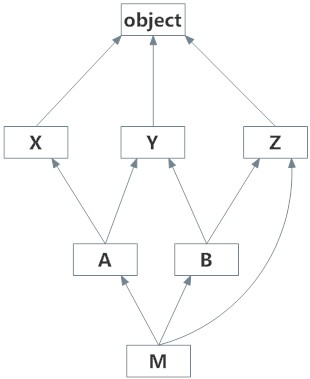

To know the actual algorithm on how MRO is calculated, visit [Discussion on MRO](http://www.python.org/download/releases/2.3/mro/).

<div class="alert alert-block alert-success">
⚠️TASK 3
<br>

Check the `.mro()` for a `JuniorScientist` class.

</div>

## Encapsulation
Using OOP in Python, we can restrict access to methods and variables. This prevents data from direct modification which is called encapsulation. In Python, we denote private attributes using underscore as the prefix i.e single `_` or double `__`.

In [34]:
class Computer:

    def __init__(self):
        self.__maxprice = 900

    def sell(self):
        print("Selling Price: {}".format(self.__maxprice))

    def setMaxPrice(self, price):
        self.__maxprice = price

c = Computer()
c.sell()

# change the price
c.__maxprice = 1000
c.sell()

# using setter function
c.setMaxPrice(1000)
c.sell()

c.__dict__

Selling Price: 900
Selling Price: 900
Selling Price: 1000


{'_Computer__maxprice': 1000, '__maxprice': 1000}

In the above program, we defined a `Computer` class.

We used `__init__()` method to store the maximum selling price of `Computer`. We tried to modify the price. However, we can't change it because Python treats the `__maxprice` as private attributes.

As shown, to change the value, we have to use a setter function i.e `setMaxPrice()` which takes price as a parameter.

Problem: https://stackoverflow.com/questions/20261517/inheritance-of-private-and-protected-methods-in-python#:~:text=There%20are%20no%20truly%20'protected,name%20on%20the%20parent%20class.

## Private classes

Pretty nice summary of the private classes: https://www.techwithtim.net/tutorials/python-programming/classes-objects-in-python/private-and-public-classes/

WATCH: [Classes & Objects Python Tutorial #6 - Private and Public Classes](https://www.youtube.com/watch?v=xY__sjI5yVU)

### Private and Public
In other programming languages there is the notion of private and public classes and methods.
**A private class is something that can only be accessed from within a certain file or directory and a private method is something that can only be called from within the class.**
A public class or method is something that can be accessed anywhere.

However, In python this does not exist. **Every class and method in python is public and there is no way to change that**. We **can only simulate creating private classes and methods** by using certain notation and conventions.

To declare something as private we use one underscore before the name.

In [35]:
class _Private:
    def __init__(self, name):
        self.name = name


class NotPrivate:
    def __init__(self, name):
        self.name = name
        self.priv = _Private(name)  # Even though we decalre something private we can still call and us it

    def _dispaly(self):  # Private
        print("Hello")

    def display(self):  # Public
        print("Hi")

The reason we declare things as private is to tell the programmer not to use them. **It is somewhat a warning to the programmer** saying that this class or method is private and that they shouldn't mess with it.

## Polymorphism
Polymorphism is an ability (in OOP) to use a common interface for multiple forms (data types).

Suppose, we need to color a shape, there are multiple shape options (rectangle, square, circle). However we could use the same method to color any shape. This concept is called Polymorphism.

In [36]:
class Parrot:

    def fly(self):
        print("Parrot can fly")
    
    def swim(self):
        print("Parrot can't swim")

class Penguin:

    def fly(self):
        print("Penguin can't fly")
    
    def swim(self):
        print("Penguin can swim")

# common interface
def flying_test(bird):
    bird.fly()

#instantiate objects
blu = Parrot()
peggy = Penguin()

# passing the object
flying_test(blu)
flying_test(peggy)

Parrot can fly
Penguin can't fly


In [37]:
blu.fly()

Parrot can fly


In the above program, we defined two classes `Parrot` and `Penguin`. Each of them have a common fly() method. However, their functions are different.

To use polymorphism, we created a common interface i.e `flying_test()` function that takes any object and calls the object's `fly()` method. Thus, when we passed the `blu` and `peggy` objects in the `flying_test()` function, it ran effectively.

<div class="alert alert-block alert-success">
⚠️TASK 4
<br>

Create a `check_pay` common method that would check the salary of each employee. Create 3 instances of different employees and check their pays.

</div>

In [53]:
class Employee:

    raise_amt = 1.04

    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.email = first + '.' + last + '@email.com'
        self.pay = pay

    def fullname(self):
        return '{} {}'.format(self.first, self.last)

    def apply_raise(self):
        self.pay = int(self.pay * self.raise_amt)

In [54]:
class Scientist(Employee):
    def __init__(self, first, last, pay=90000):
        super().__init__(first, last, pay)
        self.first = 'Dr. ' + first

class JuniorScientist(Scientist):
    def __init__(self, first, last, special_skill, pay=20000):
        super().__init__(first, last, pay)
        self.special_skill = special_skill
        self.first = first
        if self.special_skill == 'mind control':
            self.pay = 150000

def check_pay(employee):
    print(employee.pay)

jun_sci1 = JuniorScientist('Katy', 'Cherry', 'mind control')
jun_sci1.__dict__

check_pay(jun_sci1)

150000


---

## Deleting Attributes and Objects
Any attribute of an object can be deleted anytime, using the `del` statement. Try the following on the Python shell to see the output.

In [38]:
# let's consider this class for creating complex numbers
# complex numbers consists of the real number and the imaginary number

class ComplexNumber:
    def __init__(self, r=0, i=0):
        self.real = r
        self.imag = i

    def get_data(self):
        print(f'{self.real}+{self.imag}j')

In [39]:
# Create a new ComplexNumber object
num1 = ComplexNumber(2, 3)

In [40]:
# Call get_data() method
num1.get_data()

2+3j


In [41]:
# Create another ComplexNumber object
# and create a new attribute 'attr'
num2 = ComplexNumber(5)
num2.attr = 10

In [42]:
print((num2.real, num2.imag, num2.attr))

(5, 0, 10)


In [43]:
# but c1 object doesn't have attribute 'attr'
print(num1.attr)

AttributeError: 'ComplexNumber' object has no attribute 'attr'

We can even delete the object itself, using the `del` statement.

In [55]:
c1 = ComplexNumber(1,3)

In [56]:
c1.get_data()

1+3j


In [57]:
del c1

In [58]:
c1.get_data()

NameError: name 'c1' is not defined

Actually, it is more complicated than that. When we do `c1 = ComplexNumber(1,3)`, a new instance object is created in memory and the name `c1` binds with it.

On the command `del c1`, this binding is removed and the name c1 is deleted from the corresponding namespace. **The object however continues to exist in memory and if no other name is bound to it, it is later automatically destroyed**.

This automatic destruction of unreferenced objects in Python is also called **garbage collection**.

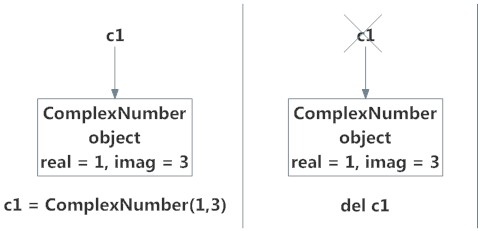
Deleting objects in Python removes the name binding

<div class="alert alert-block alert-success">
⚠️TASK 5
<br>

Try to delete one employee and then check his/her `.fullname()`.

</div>

In [48]:
del sci_1
sci_1.fullname()  # NameError: name 'sci_1' is not defined

NameError: name 'sci_1' is not defined

<div class="alert alert-block alert-success">
⚠️TASK 6
<br>

Create a `Manager` class which would have the `Employee` class as parent. The manager should have `employees` attribute, that would list all employees assigned to him/her. Then, add to this class the methods of:
- adding employees
- removing employees
- printing the list of employees assigned to a particular manager
    
Create 2 developer instances and 1 manager (the manager should have 1 developer assigned to him/her at the stage of creation of the manager). Then, print the attributes of the manager and the list of employees of the manager. Next, use the `adding` method to add the second developer to the manager. Print the list of employees, using the printing method. Then, remove the first employee from the manager, and print the list again.

</div>

In [59]:
class Manager(Employee):
    def __init__(self, first, last, pay, employees=None):
        super().__init__(first, last, pay)
        if employees is None:
            self.employees = []
        else:
            self.employees = employees

    def add_employee(self, employee):
        if employee not in self.employees:
            self.employees.append(employee)

    def remove_employee(self, employee):
        if employee in self.employees:
            self.employees.remove(employee)

    def print_employees(self):
        for emp in self.employees:
            print('-->', emp.fullname())

dev_1 = Employee('John', 'Doe', 50000)
dev_2 = Employee('Jane', 'Smith', 60000)

mgr_1 = Manager('Alice', 'Wonderland', 100000, [dev_1])
print(mgr_1.email)
mgr_1.print_employees()

mgr_1.add_employee(dev_2)
mgr_1.print_employees()

mgr_1.remove_employee(dev_1)
mgr_1.print_employees()

Alice.Wonderland@email.com
--> John Doe
--> John Doe
--> Jane Smith
--> Jane Smith


<div class="alert alert-block alert-success">
⚠️TASK 7
<br>

A very common use case for inheritance is the creation of a custom exception hierarchy. Because we use the class of an exception to determine whether it should be caught by a particular except block, it is useful for us to define custom classes for exceptions which we want to raise in our code. 
    
Using inheritance in our classes is useful because if an except block catches a particular exception class, it will also catch its child classes (because a child class is its parent class). That means that we can efficiently write except blocks which handle groups of related exceptions, just by arranging them in a logical hierarchy. Our exception classes should inherit from Python’s built-in exception classes. They often won’t need to contain any additional attributes or methods. 
    
<br>    
Write a simple program which loops over a list of user data (tuples containing a username, email and age) and adds each user to a directory if the user is at least 16 years old. You do not need to store the age. Write a simple exception hierarchy which defines a different exception for each of these error conditions:
    
    (a) the username is not unique 
    (b) the age is not a positive integer 
    (c) the user is under 16 
    (d) the email address is not valid (a simple check for a username, the @ symbol and a domain name is sufficient) 
    
Raise these exceptions in your program where appropriate. Whenever an exception occurs, your program should move onto the next set of data in the list. Print a different error message for each different kind of exception. Think about where else it would be a good idea to use a custom class, and what kind of collection type would be most appropriate for your directory. 
    
You can consider an email address to be valid if it contains one @ symbol and has a non-empty username and domain name – you don’t need to check for valid characters. You can assume that the age is already an integer value.

</div>

In [73]:
# Exceptions
class DuplicateUsernameError(Exception):
    pass

In [74]:
# A class for a user's data
class User:
    def __init__(self, username, email, age):
        self.username = username
        self.email = email
        self.age = age

In [76]:
# List of example user data
example_list = [
    ("jane", "jane@example.com", 21),
    ("bob", "bob@example", 19),
    ("jane", "jane2@example.com", 25),
    ("steve", "steve@somewhere", 15),
    ("joe", "joe", 23),
    ("anna", "anna@example.com", -3),
]

directory = {}

In [77]:
for username, email, age in example_list:
    try:
        # Create a new user instance
        user = User(username, email, age)
        
        # Check if the username already exists in the directory
        if username in directory:
            raise DuplicateUsernameError(f"Username '{username}' already exists in the directory")
        
        # Add the user to the directory
        directory[username] = user
        
    except DuplicateUsernameError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"Error: {e}")
        
# Print the contents of the directory
print("Directory contents:")
for username, user in directory.items():
    print(f"Username: {username}, Email: {user.email}, Age: {user.age}")

Error: Username 'jane' already exists in the directory
Directory contents:
Username: jane, Email: jane@example.com, Age: 21
Username: bob, Email: bob@example, Age: 19
Username: steve, Email: steve@somewhere, Age: 15
Username: joe, Email: joe, Age: 23
Username: anna, Email: anna@example.com, Age: -3


<div class="alert alert-block alert-success">
⚠️TASK 8
<br>

Create a collection of classes which can be used to represent a music collection (for example, inside a music player), focusing on how they would be related by composition. You should include classes for songs, artists, albums and playlists. Hint: write down the four class names, draw a line between each pair of classes which you think should have a relationship, and decide what kind of relationship would be the most appropriate. For simplicity you can assume that any song or album has a single “artist” value (which could represent more than one person), but you should include compilation albums (which contain songs by a selection of different artists). The “artist” of a compilation album can be a special value like “Various Artists”. You can also assume that each song is associated with a single album, but that multiple copies of the same song (which are included in different albums) can exist. 
    
Write a simple implementation of this model which clearly shows how the different classes are composed. Write some example code to show how you would use your classes to create an album and add all its songs to a playlist. Hint: if two objects are related to each other bidirectionally, you will have to decide how this link should be formed – one of the objects will have to be created before the other, so you can’t link them to each other in both directions simultaneously!

<br>
    
The following relationships should exist between the four classes: 
- a one-to-many relationship between albums and songs – this is likely to be bidirectional, since songs and albums are quite closely coupled. 
- a one-to-many relationship between artists and songs. This can be unidirectional or bidirectional. We don’t really need to store links to all of an artist’s songs on an artist object, since a reference to the artist from each song is enough for us to search our songs by artist, but if the music collection is very large it may be a good idea to cache this list. 
- a one-to-many relationship between artists and albums, which can be unidirectional or bidirectional for the same reasons.

Use the code in the `python_OOP3_PREFILLED.py` file to start.
    
</div>

In [78]:
class Song:
    def __init__(self, title, artist, year, album=None):
        self.title = title
        self.artist = artist
        self.year = year
        self.album = album

class Album:
    def __init__(self, title, artist, year):
        self.title = title
        self.artist = artist
        self.year = year
        self.tracks = []

    def add_track(self, title):
        self.tracks.append(Song(title, self.artist, self.year, self))

class Artist:
    def __init__(self, name):
        self.name = name
        self.albums = []
        self.songs = []

    def add_album(self, album):
        self.albums.append(album)

    def add_song(self, song):
        self.songs.append(song)

class Playlist:
    def __init__(self, name):
        self.name = name
        self.songs = []

    def add_song(self, song):
        self.songs.append(song)

    def playlist_contents(self):
        for i, song in enumerate(self.songs):
            print("track: {},\n                 title: {},\n                 artist: {},\n                 year: {}".format(
                i+1, song.title, song.artist.name, song.year))

band = Artist("Kozminski University Terrific Emporium (KUTE)")
album = Album("KU First Single", band, 2013)
album.add_track("A Ballad about ML")
album.add_track("Python rocks (dance remix)")
album.add_track("Object-Programming 240h long song")
playlist = Playlist("My Programming Playlist")

for song in album.tracks:
    playlist.add_song(song)

print(playlist.playlist_contents())


track: 1,
                 title: A Ballad about ML,
                 artist: Kozminski University Terrific Emporium (KUTE),
                 year: 2013
track: 2,
                 title: Python rocks (dance remix),
                 artist: Kozminski University Terrific Emporium (KUTE),
                 year: 2013
track: 3,
                 title: Object-Programming 240h long song,
                 artist: Kozminski University Terrific Emporium (KUTE),
                 year: 2013
None


# Static and Class methods

Taken from here: <br>
https://www.techwithtim.net/tutorials/python-programming/classes-objects-in-python/static-and-class-methods/

Here you have a great video about these topics: <br>
[Python OOP Tutorial (Object Orientated Programming ) - Static Methods and Class Methods](https://www.youtube.com/watch?v=MpuOuZKWUWw)

## Static Methods

Static methods are methods within a class that have no access to anything else in the class (no self keyword or cls keyword). They cannot change or look at any object attributes or call other methods within the class. They can be thought of as a special kind of function that sits inside of the class. When we create a static method we must use something called a decorator. The decorator for a static method is "@staticmethod".

In [ ]:
class myClass:
    def __init__(self):
        self.x = x

    @staticmethod
    def staticMethod():  
        return "i am a static method"

# Notice staticMethod does not require the self parameter

## Class Methods

Class methods are methods within a class that only have access to class variables and other class methods. They are passed the name of the class and therefore can access anything within the class. Like static methods they cannot access any instance attributes. You can create a class method by using the "@classmethod" decorator.

In [ ]:
class myClass:
    count = 0

    def __init__(self, x):
        self.x = x

    @classmethod
    def classMethod(cls):  
        cls.count += 1
# The classMethod can access and modify class variables. 
# It takes the class name as a required parameter

In [ ]:
obj = myClass(20)

In [ ]:
obj.count

In [ ]:
obj.classMethod()

In [ ]:
obj.count

In [ ]:
myClass.count

---

## Key Points to Remember:
- Object-Oriented Programming makes the program easy to understand as well as efficient.
- Since the class is sharable, the code can be reused.
- Data is safe and secure with data abstraction.
- Polymorphism allows the same interface for different objects, so programmers can write efficient code.

These are all basic elements of OOP in Python. 

If you'd like to explore the topic of OOP more, I'd recommend e.g., the following book: <br><br>
Phillips, D. (2018). Python 3 Object-Oriented Programming: Build robust and maintainable software with object-oriented design patterns in Python 3.8, 3rd Edition. Packt Publishing Ltd.
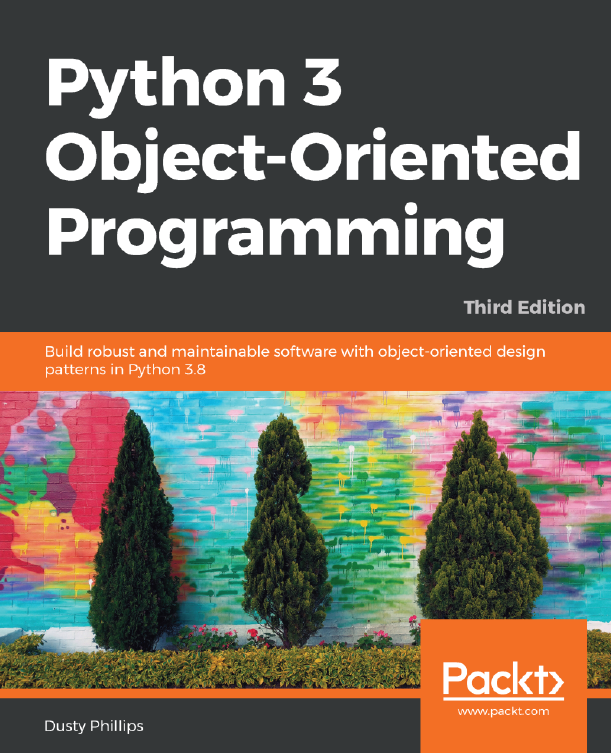